## Test notebook for Data Management Acceptance Test Campaign 1
This test will be executed on the Rubin Science Platform Notebook Aspect at the Interim Data Facility, initialized with Science Pipelines release w_2022_40.

### Test case LVV-T136: Verify implementation of Image Data Product Access

Verify that available image data products can be listed and retrieved.

In [1]:
from lsst.daf.butler import Butler

import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay

#### Initialize the butler pointing to DP0.2 data:

In [2]:
# For DP0.2 data on the IDF:                                                                                                           
config = 'dp02'
collection = '2.2i/runs/DP0.2'
butler = Butler(config, collections=collection)

#### Define some data dimensions to use for querying datasets:

In [3]:
tract = 3828
patch = 42
detector = 42

#### Execute a butler registry query to list `calexp` images that match the selected dimensions.

Note that `calexps` are defined with dimensions of visit and detector, but here we supply tract and patch constraints. This demonstrates that the query is able to identify which visits overlap the patch/tract combination that has been provided.

In [4]:
data_refs = butler.registry.queryDatasets(
    datasetType="calexp",
    where=f"tract={tract} and patch={patch} and detector={detector} and skymap='DC2'")

data_ids = []

for data_ref in data_refs:
    print(data_ref.dataId.full)
    data_ids.append(data_ref.dataId.full)

{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 414872}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 457676}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 713247}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 1013706}
{band: 'y', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'y_sim_1.4', visit_system: 1, visit: 1138156}
{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 1155522}
{band: 'z', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'z_sim_1.4', visit_system: 1, visit: 1174350}
{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 1192139}


This demonstrates the ability to identify and list available imaging datasets via the Butler middleware.

#### Select and retrieve a single PVI (aka "calexp") for examination

In [5]:
# extract the calexp image
calexp = butler.get('calexp', dataId=data_ids[0])
#src = butler.get('src', dataId=dataId)

#psf = calexp.getPsf()
#wcs = calexp.getWcs()

#### Examine the image to confirm that it is well-formed

In [6]:
afwDisplay.setDefaultBackend('matplotlib')

# Set up some plotting defaults:
params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [7, 7],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

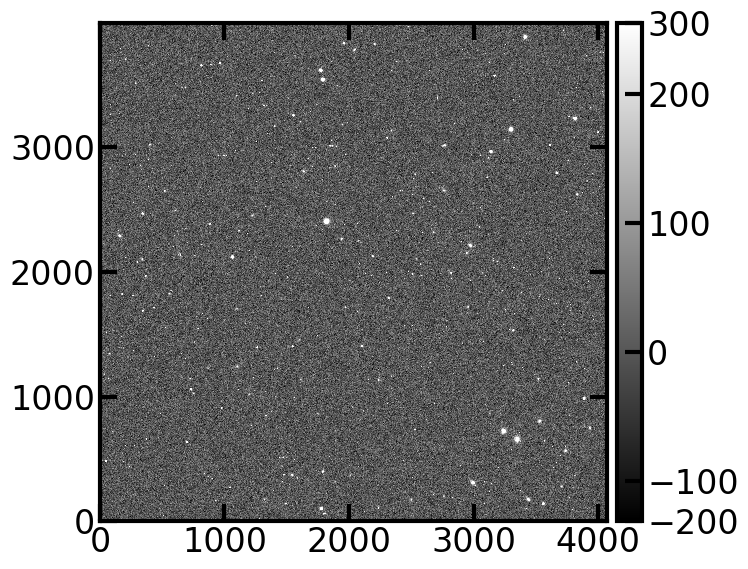

In [7]:
# create a matplotlib.pyplot figure
fig = plt.figure()
# get an alias to the lsst.afw.display.Display() method
display = afwDisplay.Display(frame=fig)
# set the image stretch algorithm and range
display.scale('linear', 'zscale')
# load the image into the display
display.mtv(calexp.image)
# show the corresponding pyplot figure
plt.show()


#### Extract some statistics from the images:

In [8]:
print('  image           median     stddev    (of image pixel values)')
print('calexp:           ', np.nanmedian(calexp.image.array), np.nanstd(calexp.image.array))
print('variance:         ', np.nanmedian(calexp.variance.array), np.nanstd(calexp.variance.array))

  image           median     stddev    (of image pixel values)
calexp:            0.65257454 307.72455
variance:          1704.5837 449.57498


These are as expected -- the calexp is sky-subtracted, so it has roughly zero median flux.

#### Repeat the exercise for a difference image (`goodSeeingDiff_differenceExp`):

In [9]:
data_refs_diffim = butler.registry.queryDatasets(
    datasetType="goodSeeingDiff_differenceExp",
    where=f"tract={tract} and patch={patch} and detector={detector} and skymap='DC2'")

data_ids_diffim = []

for data_ref in data_refs_diffim:
    print(data_ref.dataId.full)
    data_ids_diffim.append(data_ref.dataId.full)

{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 414872}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 457676}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 713247}
{band: 'i', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'i_sim_1.4', visit_system: 1, visit: 1013706}
{band: 'y', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'y_sim_1.4', visit_system: 1, visit: 1138156}
{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 1155522}
{band: 'z', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'z_sim_1.4', visit_system: 1, visit: 1174350}
{band: 'r', instrument: 'LSSTCam-imSim', detector: 42, physical_filter: 'r_sim_1.4', visit_system: 1, visit: 1192139}


In [10]:
diffim = butler.get('goodSeeingDiff_differenceExp', dataId=data_ids_diffim[0])

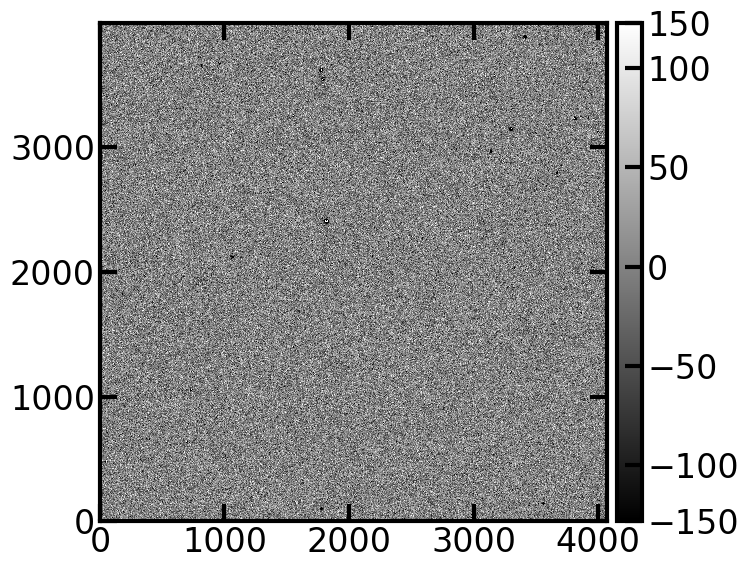

In [11]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(diffim.image)
plt.show()

In [12]:
print('  image           median     stddev    (of image pixel values)')
print('calexp:           ', np.nanmedian(diffim.image.array), np.nanstd(diffim.image.array))
print('variance:         ', np.nanmedian(diffim.variance.array), np.nanstd(diffim.variance.array))

  image           median     stddev    (of image pixel values)
calexp:            0.15164152 164.64862
variance:          1638.8611 nan


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


These are as expected -- the difference image has roughly zero median flux.

#### Repeat the exercise for a deep coadd image (`deepCoadd_calexp`):

In [13]:
data_refs_coadd = butler.registry.queryDatasets(
    datasetType="deepCoadd_calexp",
    where=f"tract={tract} and patch={patch} and detector={detector} and skymap='DC2'")

data_ids_coadd = []

for data_ref in data_refs_coadd:
    print(data_ref.dataId.full)
    data_ids_coadd.append(data_ref.dataId.full)

{band: 'z', skymap: 'DC2', tract: 3828, patch: 42}
{band: 'g', skymap: 'DC2', tract: 3828, patch: 42}
{band: 'i', skymap: 'DC2', tract: 3828, patch: 42}
{band: 'u', skymap: 'DC2', tract: 3828, patch: 42}
{band: 'r', skymap: 'DC2', tract: 3828, patch: 42}
{band: 'y', skymap: 'DC2', tract: 3828, patch: 42}


In [14]:
coadd = butler.get('deepCoadd_calexp', dataId=data_ids_coadd[0])

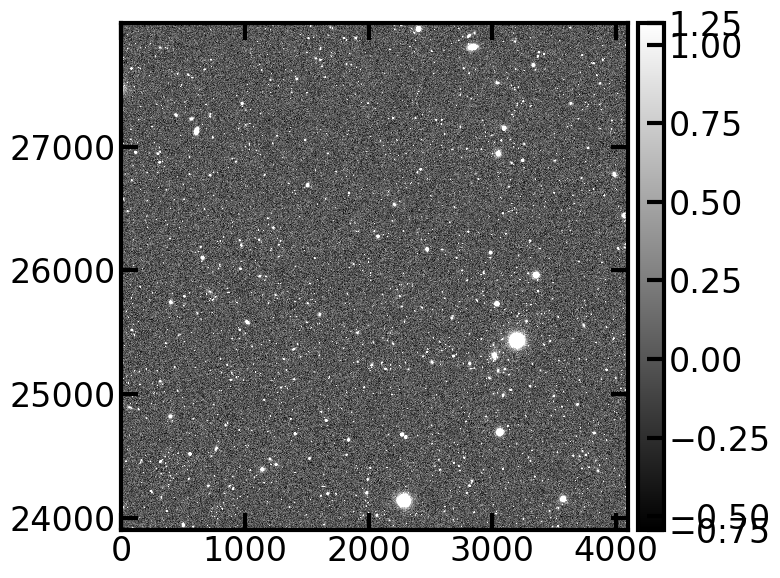

In [15]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(coadd.image)
plt.show()

This is obviously a much deeper image.

We have now demonstrated the ability to list and retrieve images via the Butler.